In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected='true')
import os
import datetime 
from prophet import Prophet
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel(r'C:\Users\Maite\Downloads\consumo-de-electricidad-en-centros-de-la-administracion-autonomica-de-castilla-y.xlsx', parse_dates=True)
df.head()

,TIPO DE CENTRO DE CONSUMO,MUNICIPIO,PROVINCIA,TIPO SUMINISTRO ELÉCTRICO,FECHA,CONSUMO MENSUAL ENERGÍA ACTIVA (kWh),P1 (kW),P2 (kW),P3 (kW),P4 (kW),P5 (kW),P6 (kW)
0,EDIFICIO CALEFACTADO,VALLADOLID,VALLADOLID,Principal,2024-06,38288,254.0,254.0,254.0,254.0,254.0,345.0
1,EDIFICIO CALEFACTADO,VALLADOLID,VALLADOLID,Principal,2024-06,24574,80.0,80.0,80.0,80.0,122.0,140.0
2,DELEGACION TERRITORIAL,SALAMANCA,SALAMANCA,Principal,2024-06,101265,396.0,396.0,396.0,396.0,396.0,680.0
3,DELEGACION TERRITORIAL,SORIA,SORIA,Principal,2024-06,38922,180.0,180.0,180.0,180.0,180.0,451.0
4,NaN,VALLADOLID,VALLADOLID,Principal,2024-06,43191,380.0,380.0,380.0,380.0,380.0,380.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121077 entries, 0 to 121076
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   TIPO DE CENTRO DE CONSUMO             120425 non-null  object 
 1   MUNICIPIO                             121077 non-null  object 
 2   PROVINCIA                             121077 non-null  object 
 3   TIPO SUMINISTRO ELÉCTRICO             121077 non-null  object 
 4   FECHA                                 121077 non-null  object 
 5   CONSUMO MENSUAL ENERGÍA ACTIVA (kWh)  121077 non-null  int64  
 6   P1 (kW)                               121077 non-null  float64
 7   P2 (kW)                               121077 non-null  float64
 8   P3 (kW)                               82320 non-null   float64
 9   P4 (kW)                               82320 non-null   float64
 10  P5 (kW)                               82320 non-null   float64
 11  

In [4]:
df['FECHA'] = pd.to_datetime(df['FECHA'])

In [5]:
df.dtypes

TIPO DE CENTRO DE CONSUMO                       object
MUNICIPIO                                       object
PROVINCIA                                       object
TIPO SUMINISTRO ELÉCTRICO                       object
FECHA                                   datetime64[ns]
CONSUMO MENSUAL ENERGÍA ACTIVA (kWh)             int64
P1 (kW)                                        float64
P2 (kW)                                        float64
P3 (kW)                                        float64
P4 (kW)                                        float64
P5 (kW)                                        float64
P6 (kW)                                        float64
dtype: object

In [6]:
df['Month_Year'] = df['FECHA']
print(df.dtypes)
#print(type(df['Month_Year'].iloc[0]))

TIPO DE CENTRO DE CONSUMO                       object
MUNICIPIO                                       object
PROVINCIA                                       object
TIPO SUMINISTRO ELÉCTRICO                       object
FECHA                                   datetime64[ns]
CONSUMO MENSUAL ENERGÍA ACTIVA (kWh)             int64
P1 (kW)                                        float64
P2 (kW)                                        float64
P3 (kW)                                        float64
P4 (kW)                                        float64
P5 (kW)                                        float64
P6 (kW)                                        float64
Month_Year                              datetime64[ns]
dtype: object


In [7]:
df_model = df[['Month_Year','CONSUMO MENSUAL ENERGÍA ACTIVA (kWh)']].copy()
df_model.head()

,Month_Year,CONSUMO MENSUAL ENERGÍA ACTIVA (kWh)
0,2024-06-01,38288
1,2024-06-01,24574
2,2024-06-01,101265
3,2024-06-01,38922
4,2024-06-01,43191


In [8]:
df_model = df[['Month_Year','CONSUMO MENSUAL ENERGÍA ACTIVA (kWh)']].groupby('Month_Year').agg({'CONSUMO MENSUAL ENERGÍA ACTIVA (kWh)':'sum'}).copy()
df_model.head()

,CONSUMO MENSUAL ENERGÍA ACTIVA (kWh)
Month_Year,
2018-01-01,20334445
2018-02-01,19078172
2018-03-01,19999382
2018-04-01,17676467
2018-05-01,17277040


In [9]:
split_date = '2023-05'
split_date = pd.to_datetime(split_date)
#split_date = split_date.to_period('ME')

In [10]:
df_model.reset_index(inplace=True)
df_model.rename(columns={'Month_Year':'ds','CONSUMO MENSUAL ENERGÍA ACTIVA (kWh)':'y'},inplace=True)

In [11]:
print(type(df['Month_Year']))
print(type(split_date))

<class 'pandas.core.series.Series'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [33]:
df_train = df_model[df_model['ds'] <= split_date]
df_test = df_model[df_model['ds'] > split_date]

In [34]:
prophet = Prophet()

In [35]:
prophet.fit(df_train)

16:52:23 - cmdstanpy - INFO - Chain [1] start processing
16:52:23 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
df_pred = prophet.predict(df_test)

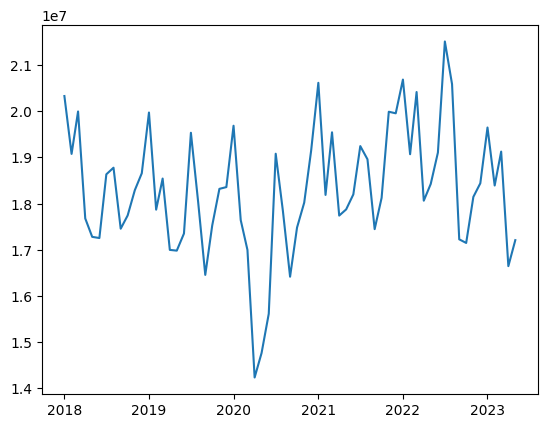

In [59]:
plt.plot(df_train['ds'],df_train['y'])

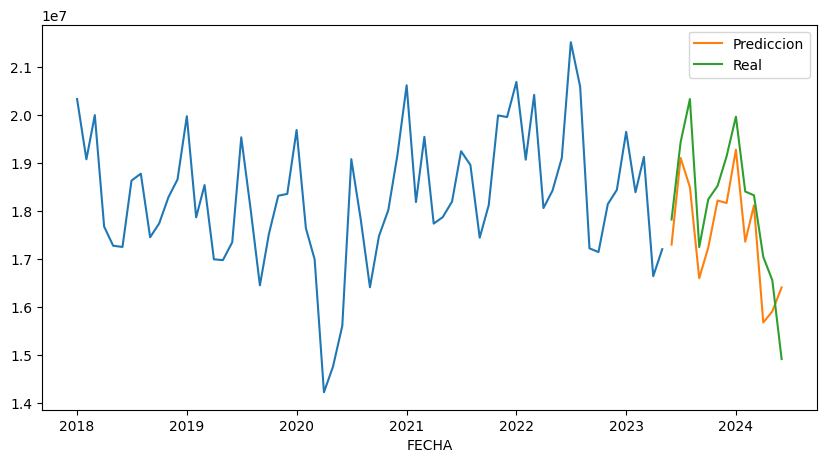

In [60]:
plt.figure(figsize=(10,5))
plt.plot(df_train['ds'],df_train['y'])
plt.plot(df_pred['ds'], df_pred['yhat'], label='Prediccion')
plt.plot(df_pred['ds'], df_test['y'], label='Real')


plt.legend()
plt.xlabel('FECHA')
plt.show()

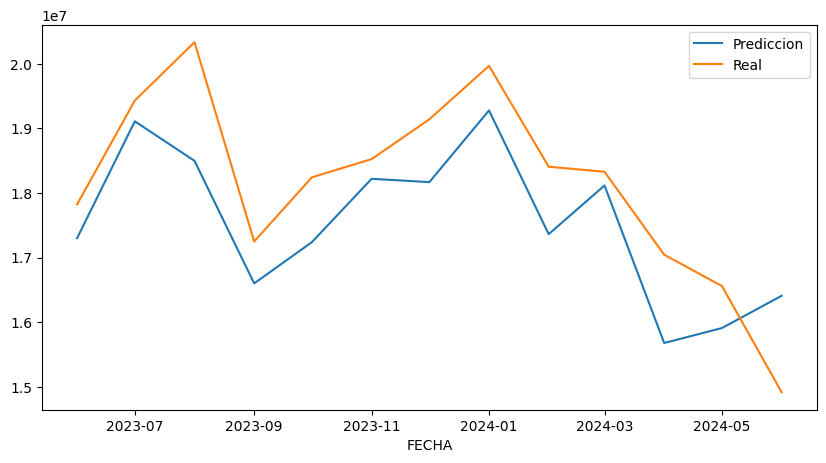

In [61]:
plt.figure(figsize=(10,5))
plt.plot(df_pred['ds'], df_pred['yhat'], label='Prediccion')
plt.plot(df_pred['ds'], df_test['y'], label='Real')


plt.legend()
plt.xlabel('FECHA')
plt.show()

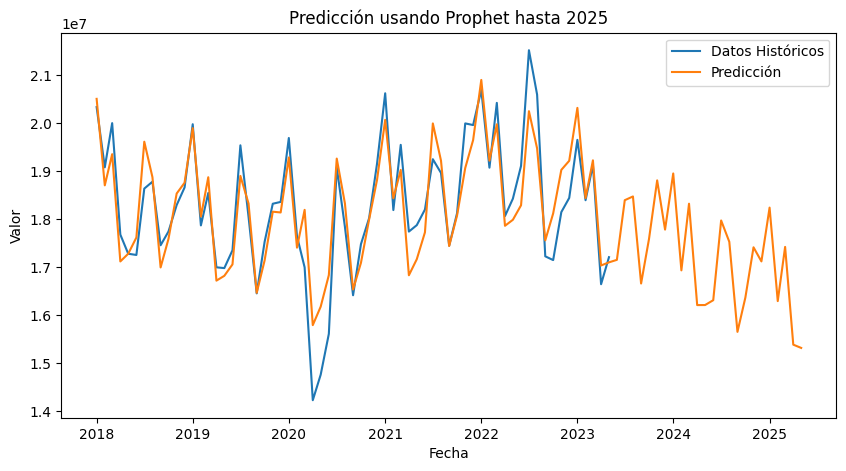

In [58]:
future = prophet.make_future_dataframe(periods=24, freq='ME')
df_pred_2025 = prophet.predict(future)

plt.figure(figsize=(10, 5))
plt.plot(df_train['ds'], df_train['y'], label='Datos Históricos')
plt.plot(df_pred_2025['ds'], df_pred_2025['yhat'], label='Predicción')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.title('Predicción usando Prophet hasta 2025')
plt.show()

In [62]:
y_real = df_test['y']
y_pred = df_pred['yhat']

r2 = r2_score(y_real, y_pred)

print(f'R^2: {r2}')

R^2: 0.5265483105105512


## Por ciudad

In [69]:
provincias = df['PROVINCIA'].unique()

In [70]:
for i in provincias:
    df_provincia = df[df['PROVINCIA'] == 'VALLADOLID'].copy()
    
    df_provincia.rename(columns={'FECHA':'ds','CONSUMO MENSUAL ENERGÍA ACTIVA (kWh)':'y'},inplace=True)
    
    modelo = Prophet()
    modelo.fit(df_provincia)
    
    df_pred_provincias = prophet.predict(df_test)

17:34:21 - cmdstanpy - INFO - Chain [1] start processing
17:34:25 - cmdstanpy - INFO - Chain [1] done processing
17:34:26 - cmdstanpy - INFO - Chain [1] start processing
17:34:31 - cmdstanpy - INFO - Chain [1] done processing
17:34:33 - cmdstanpy - INFO - Chain [1] start processing
17:34:37 - cmdstanpy - INFO - Chain [1] done processing
17:34:39 - cmdstanpy - INFO - Chain [1] start processing
17:34:44 - cmdstanpy - INFO - Chain [1] done processing
17:34:47 - cmdstanpy - INFO - Chain [1] start processing
17:34:52 - cmdstanpy - INFO - Chain [1] done processing
17:34:54 - cmdstanpy - INFO - Chain [1] start processing
17:34:59 - cmdstanpy - INFO - Chain [1] done processing
17:35:00 - cmdstanpy - INFO - Chain [1] start processing
17:35:05 - cmdstanpy - INFO - Chain [1] done processing
17:35:07 - cmdstanpy - INFO - Chain [1] start processing
17:35:11 - cmdstanpy - INFO - Chain [1] done processing
17:35:12 - cmdstanpy - INFO - Chain [1] start processing
17:35:16 - cmdstanpy - INFO - Chain [1]

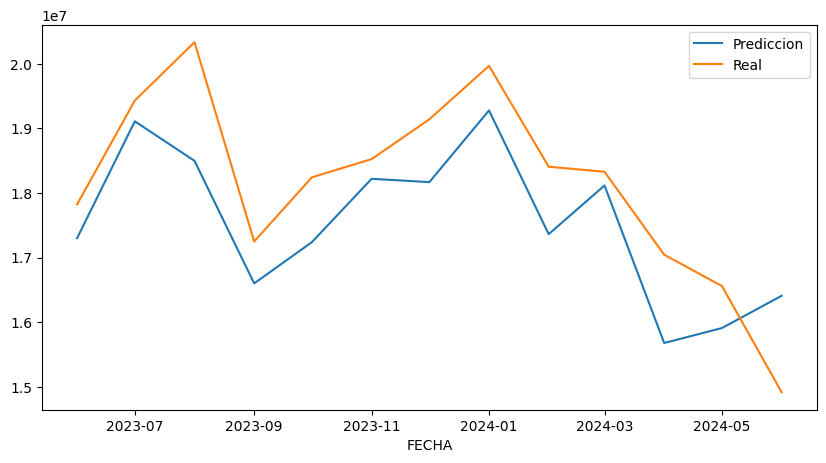

In [73]:
plt.figure(figsize=(10,5))
plt.plot(df_pred_provincias['ds'], df_pred_provincias['yhat'], label='Prediccion')
plt.plot(df_pred_provincias['ds'], df_test['y'], label='Real')


plt.legend()
plt.xlabel('FECHA')
plt.show()